# mcupy
This is a python wrapper for mcupy<br/>

## Installation
This library relies on <br/>
1. ![astrojhgu/mcmc_utilities](https://github.com/astrojhgu/mcmc_utilities): the core part for describing the graph structure of bayesian networks<br/>
2. ![astrojhgu/coscalcpp](https://github.com/astrojhgu/coscalcpp): for performing cosmology calculation (this library is actually for astronomer<br/>
3. ![astrojhgu/east](https://github.com/astrojhgu/east): parsing expression<br/>

Be sure to puth all above three libs and this lib in the same parent directory.<br/>

And it relies on ![boost](https://github.com/boostorg/boost)<br/>

After above libs are installed, just execute go into pymcutil and run
```shell
./setup.sh build
./setup.sh install # as root if needed
```
##Example
Check ![example/estimate_eff/estimate_eff.py](example/estimate_eff/estimate_eff1.py).<br/>
This is an example given in thie book ![BAYESIAN METHODS FOR THE PHYSICAL SCIENCES](http://www.brera.mi.astro.it/~andreon/BayesianMethodsForThePhysicalSciences/) section 8.2.

First let's import necessary packages

In [1]:
import sys
from mcupy.graph import *
from mcupy.nodes import *
from mcupy.utils import *
try:
    import pydot
except(ImportError):
    import pydot_ng as pydot

Create a graph object, which is used to hold nodes.

In [2]:
g=Graph()

Create some nodes

In [3]:
A=UniformNode(0.001,1-1e-5).withTag("A")
B=UniformNode(0.001,1-1e-5).withTag("B")
mu=UniformNode(.001,100-1e-5).withTag("mu")
sigma=UniformNode(.001,100-1e-5).withTag("sigma")

And some more nodes

In [4]:
for l in open('eff.txt'):
    e1,nrec1,ninj1=l.split()
    e1=float(e1)
    nrec1=float(nrec1)
    ninj1=float(ninj1)
    E=C_(e1).inGroup("E")
    ninj=C_(ninj1).inGroup("ninj")
    eff=((B-A)*PhiNode((E-mu)/sigma)+A).inGroup("eff")
    nrec=BinNode(eff,ninj).withObservedValue(nrec1).inGroup("nrec")
    g.addNode(nrec)

Then let us check the topology of graph

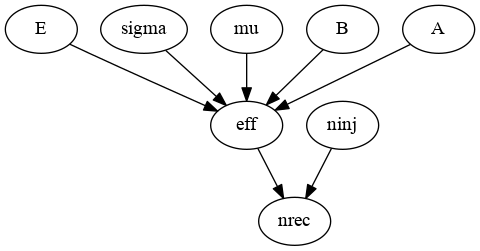

In [5]:
display_graph(g)

It's correct.<br/>
Then we'd like to perform several sampling and record the values.<br/>

Before sampling, we need to decide which variables we need to monitor.

In [6]:
mA=g.getMonitor(A)
mB=g.getMonitor(B)
mSigma=g.getMonitor(sigma)
mMu=g.getMonitor(mu)

We need a variable to hold the results

In [7]:
result=[]

Then we perform the sampling for 1000 time for burning

In [8]:
for i in log_progress(range(1000)):
    g.sample()    

Then we perform 30000 sampling and record the results

In [9]:
for i in log_progress(range(30000)):
    g.sample()
    result.append([mA.get(),mB.get(),mMu.get(),mSigma.get()])

Then we plot the results.

/usr/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/lib/python3.5/site-packages/matplotlib/__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


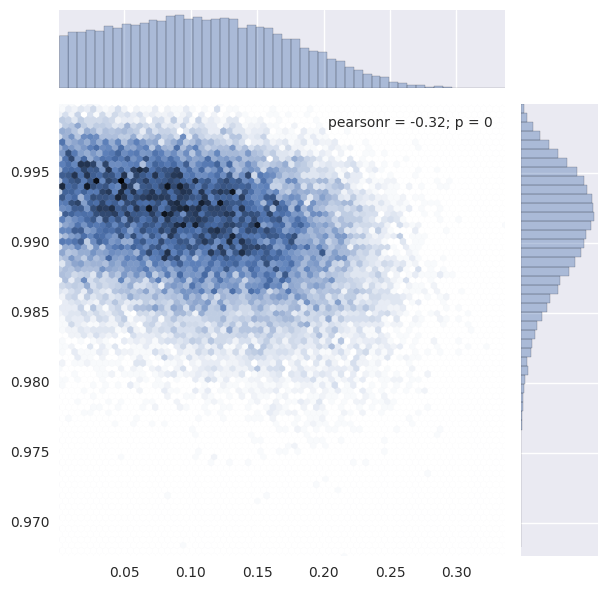

In [10]:
%matplotlib inline
import seaborn
import scipy
result=scipy.array(result)
seaborn.jointplot(result[:,0],result[:,1],kind='hex')

/usr/lib/python3.5/site-packages/matplotlib/__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


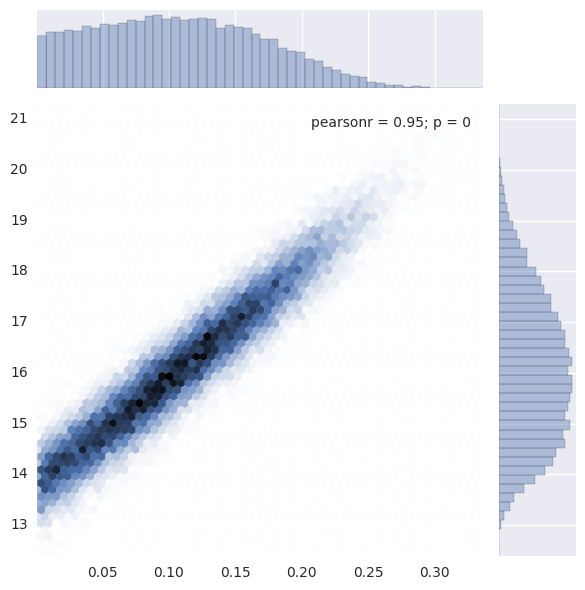

In [11]:
seaborn.jointplot(result[:,0],result[:,2],kind='hex')

/usr/lib/python3.5/site-packages/matplotlib/__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


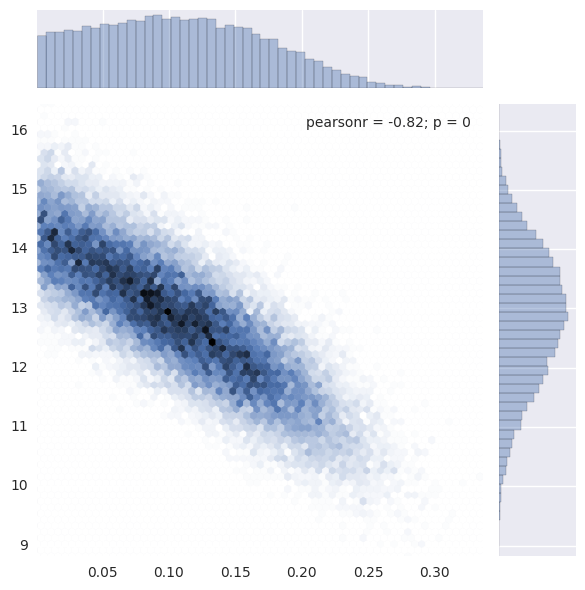

In [12]:
seaborn.jointplot(result[:,0],result[:,3],kind='hex')

/usr/lib/python3.5/site-packages/matplotlib/__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


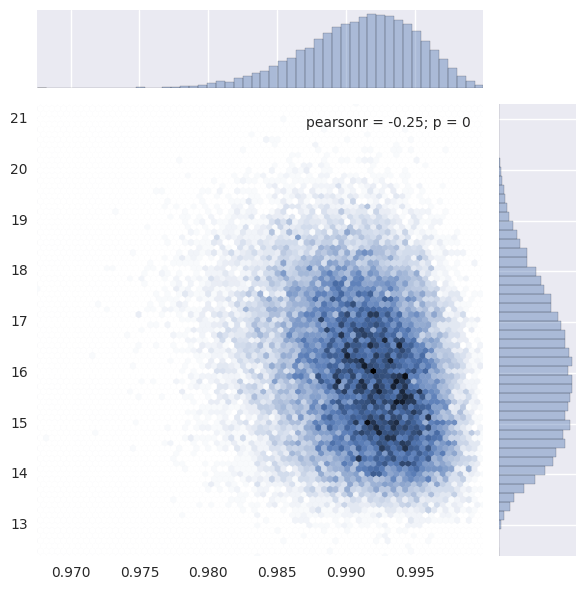

In [13]:
seaborn.jointplot(result[:,1],result[:,2],kind='hex')

/usr/lib/python3.5/site-packages/matplotlib/__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


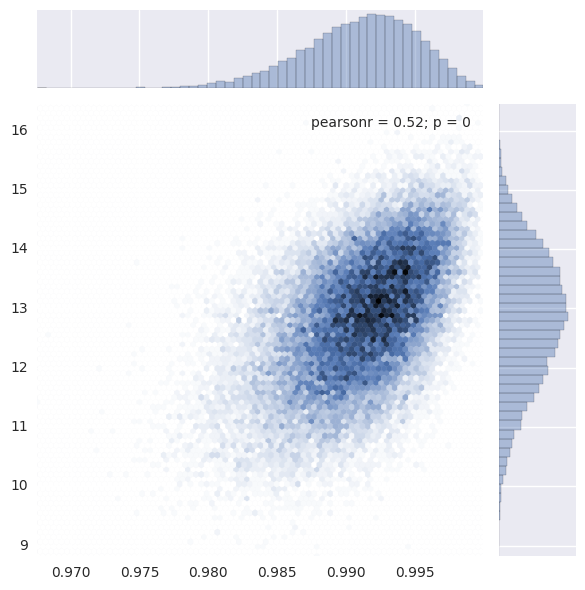

In [14]:
seaborn.jointplot(result[:,1],result[:,3],kind='hex')

/usr/lib/python3.5/site-packages/matplotlib/__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


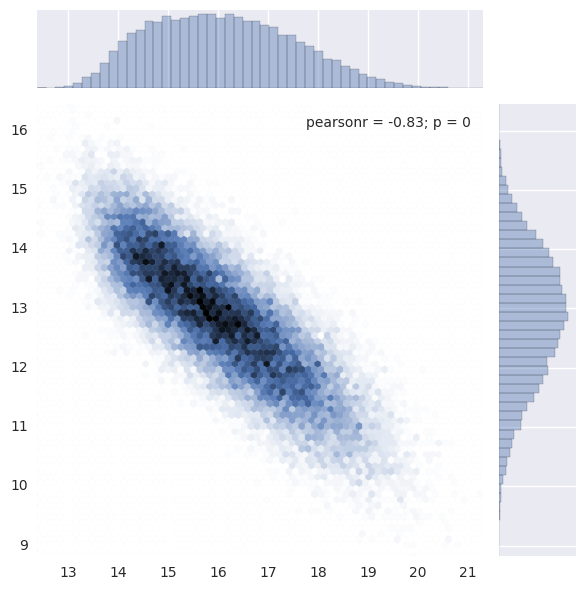

In [15]:
seaborn.jointplot(result[:,2],result[:,3],kind='hex')